In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
import math 
from scipy.linalg import eigh

In [19]:
def H_Matrix(i, j):
    if((i+j)%2 ==0):
        return -4*((1-i-j-2*i*j)/(i+j+3)*(i+j+1)*(i+j-1))
    else:
        return 0


def S_Matrix(i, j):
    if((i+j)%2 ==0):
        return (2/(i+j+5)) - (4/(i+j+3)) + (2/(i+j+1))
    else:
        return 0

In [20]:
H = [[H_Matrix(i, j) for j in range(3)] for i in range(3)]
S = [[S_Matrix(i, j) for j in range(3)] for i in range(3)]

In [21]:
eigenvals, eigenvecs = eigh(H,S,eigvals_only = False)
eigenvecs = eigenvecs.T

In [22]:
r = np.linspace(-1,1 , 100)
N=3

In [23]:
def trial(x,n):
    return (x**n)*(x-1)*(x+1)

def psi(i,x):
    val=0.0
    for p in range(N):
        val += eigenvecs[i][p]*trial(x,p)
    return val
    

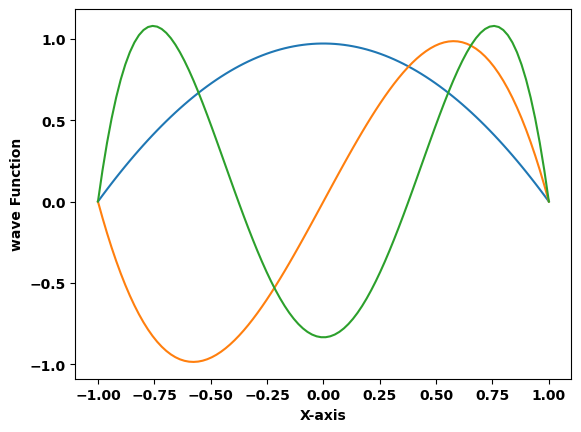

In [24]:
for i in range(N):
    wfn = [psi(i,x) for x in r]
    plt.plot(r,wfn)
    plt.xlabel('X-axis')
    plt.ylabel('wave Function')

<h1>Hydrogen Atom</h1>

In [1]:
def S_H(i, j):
    return (np.pi/(a[i]+a[j]))**(3/2)

def T_H(i, j):
    num = 3*a[i]*a[j]*(np.pi)**(3/2)
    den = (a[i]+a[j])**(5/2)
    return num/den

def A_H(i, j):
    return -4*(np.pi/(a[i]+a[j]))

In [2]:
a = [13.00773,1.962079,0.444529,0.1219492]
N = 4

In [5]:
TH = [[T_H(i, j) for j in range(4)] for i in range(4)]
AH = [[A_H(i, j) for j in range(4)] for i in range(4)]
SH = [[S_H(i, j) for j in range(4)] for i in range(4)]


In [6]:
HH= np.zeros((N, N),dtype= int)

for i in range(len(TH)):
    for j in range(len(TH[0])):
        HH[i][j] = TH[i][j] + AH[i][j]

In [7]:
eigenvalsH, eigenvecsH = eigh(HH,SH,eigvals_only = False)
eigenvecsH = eigenvecsH.T

In [16]:
rH = np.linspace(0,5 , 100)
# N = 4

In [17]:
psiH = []
def trialH(b,x):
    return np.exp(-b*x**2)

for i in range(N):
    psiH.append([])
    for j in range(len(rH)):
        temp =0
        for k in range(N):
            trial = trialH(a[k], rH[j])
            temp += eigenvecsH[i][k]*trial
        psiH[-1].append(temp)

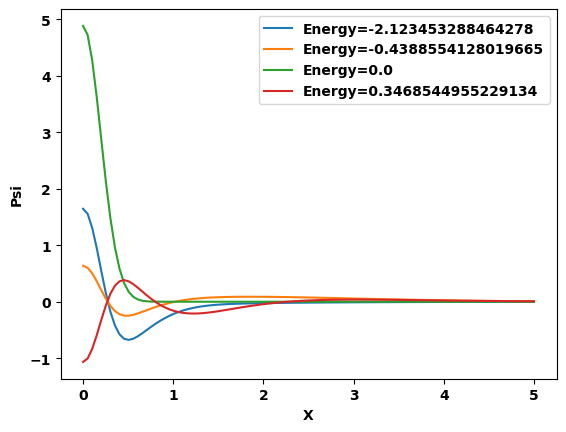

In [18]:
for i in range(N):
 plt.plot(rH, psiH[i], label='Energy={}'.format(eigenvalsH[i]))
plt.legend()
plt.xlabel('X')
plt.ylabel('Psi')
plt.show()